### Crypto Statiscal Arbitrage by @albercej 2020

http://www.quantatrisk.com/2017/11/07/earning-money-cryptocurrency-statistical-arbitrage-python/

In [6]:
# Earning Money in Cryptocurrency Markets by Spotting 
# Statistical Arbitrage Opportunities
#
# tested in Python 3.7.0
# (c) 2020, Alberto Cejudo
 
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from datetime import datetime
import json
from bs4 import BeautifulSoup
import requests
 
%matplotlib inline
 
grey = .6, .6, .6
 

In [407]:
API_KEY = "b013db9336298714f6ac81d1e4189c8ca439bbe20e32ecd5b513185944cf5e7a"
# define a pair
fsym = "ETH"
tsym = "USD"
url = f"https://min-api.cryptocompare.com/data/top/mktcapfull?limit=10&tsym=USD&e=Coinbase&api_key={API_KEY}"
#url = f"https://min-api.cryptocompare.com/data/top/totalvolfull?limit=100&tsym=USD&api_key={API_KEY}"
#url = f"https://min-api.cryptocompare.com/data/top/exchanges/full?fsym={fsym}&tsym=USD&api_key={API_KEY}"
#url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym={fsym}&tsym={tsym}&limit=10&api_key={API_KEY}'
url1 = f"https://min-api.cryptocompare.com/data/top/exchanges?limit=20&fsym={fsym}&tsym=USD&api_key={API_KEY}"
#url = f"https://min-api.cryptocompare.com/api/data/coinsnapshot/?fsym={fsym}&tsym={tsym}&api_key={API_KEY}"
response = requests.get(url)
response1 = requests.get(url1)
soup = BeautifulSoup(response.content, "html.parser")
soup1 = BeautifulSoup(response1.content, "html.parser")
dic = json.loads(soup.prettify())
dic1 = json.loads(soup1.prettify())
#print(dic)

In [408]:
#print(dic1)

In [409]:
# Top Markets para un par (GradePoints)
pvol = pd.json_normalize(dic1, "Data") #max_level=0)
pvol

,exchange,fromSymbol,toSymbol,volume24h,volume24hTo,price,lastUpdateTs,exchangeGradePoints,exchangeGrade
0,Gemini,ETH,USD,15730.813095,7.259836e+06,471.660000,1605119080,79.38,AA
1,Coinbase,ETH,USD,169812.775757,7.846537e+07,471.640000,1605119099,77.82,AA
2,Kraken,ETH,USD,71145.922886,3.285016e+07,471.830000,1605119106,71.56,A
3,itBit,ETH,USD,10741.113030,4.974884e+06,471.550000,1605119104,71.23,A
4,Bitstamp,ETH,USD,53574.287188,2.471459e+07,471.510000,1605119098,70.35,A
5,Liquid,ETH,USD,1740.959492,8.040965e+05,470.850000,1605118310,68.85,A
6,Bitfinex,ETH,USD,84732.110591,3.914073e+07,471.203631,1605119080,66.48,A
7,Cexio,ETH,USD,1720.274413,7.935538e+05,472.360000,1605118615,66.31,A
8,ftx,ETH,USD,43219.385000,1.991790e+07,471.950000,1605119059,64.23,BB
9,BitTrex,ETH,USD,5289.311657,2.441726e+06,471.804000,1605119065,63.36,BB


In [410]:
# Lista de 8 mejores exchanges.........
markets = np.array(pvol["exchange"].iloc[:8])
"""
d = pvol['exchange']  # a list
for i in range(len(d)):
    market.append(d[i]['volume24h'])
    print(market[-1])
"""
markets

array(['Gemini', 'Coinbase', 'Kraken', 'itBit', 'Bitstamp', 'Liquid',
       'Bitfinex', 'Cexio'], dtype=object)

In [411]:
# Crypto ordenadas por MarketCap
cap = pd.json_normalize(dic, "Data") #max_level=0)
mcap = pd.DataFrame(cap)[["CoinInfo.Name", "CoinInfo.FullName","DISPLAY.USD.MKTCAP"]]
mcap

,CoinInfo.Name,CoinInfo.FullName,DISPLAY.USD.MKTCAP
0,BTC,Bitcoin,$ 294.85 B
1,ETH,Ethereum,$ 53.46 B
2,XRP,XRP,$ 25.88 B
3,USDT,Tether,$ 17.48 B
4,LINK,Chainlink,$ 13.30 B
5,CRO,Crypto.com Chain Token,$ 7.09 B
6,BNB,Binance Coin,$ 4.91 B
7,BCH,Bitcoin Cash,$ 4.84 B
8,DOT,Polkadot,$ 4.55 B
9,XLM,Stellar,$ 4.08 B


In [341]:
# lista de exchanges
#
#market = []
#d = dic['Data']['exchanges']  # a list
#for i in range(len(d)):
#    market.append(d[i]['MARKET'])
#    print(market[-1])

In [342]:
# volumen por mercado en las ultimas 24 horas
#
#vol = []
#d = dic['Data']['Exchanges']  # a list
#for i in range(len(d)):
#    vol.append([d[i]['MARKET'], round(float(d[i]['VOLUME24HOUR']),2)])
 
# sort a list of sublists according to 2nd item in a sublist
#vol = sorted(vol, key=lambda x: -x[1])
 
# Cryptocurrency Markets according to Volume traded within last 24 hours
#for e in vol:
#    print("%10s%15.2f" % (e[0], e[1]))

In [343]:
# Select Top 10 Cryptocurrency Markets
#markets = [e[0] for e in vol][0:5]
#print(markets)

### Downloading Cryptocurrency Price Time-Series by specifying Exchange

In [412]:
def fetchCryptoOHLC_byExchange(fsym, tsym, exchange):
    # a function fetches a crypto OHLC price-series for fsym/tsym and stores
    # it in a pandas DataFrame; uses specific Exchange as provided
    # src: https://www.cryptocompare.com/api/
 
    cols = ['date', 'timestamp', 'open', 'high', 'low', 'close']
    lst = ['time', 'open', 'high', 'low', 'close']
 
    timestamp_today = datetime.today().timestamp()
    curr_timestamp = timestamp_today
 
    for j in range(2):
        df = pd.DataFrame(columns=cols)
        url = "https://min-api.cryptocompare.com/data/histoday?fsym=" + fsym + \
              "&tsym=" + tsym + "&toTs=" + str(int(curr_timestamp)) + \
              "&limit=2000" + "&e=" + exchange
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "html.parser")
        dic = json.loads(soup.prettify())
        
        for i in range(1, 2001):
            tmp = []
            for e in enumerate(lst):
                x = e[0]
                y = dic['Data'][i][e[1]]
                if(x == 0):
                    # timestamp-to-date
                    td = datetime.fromtimestamp(int(y)).strftime('%Y-%m-%d')
                    tmp.append(td)  #(str(timestamp2date(y)))
                tmp.append(y)
            if(np.sum(tmp[-4::]) > 0):
                df.loc[len(df)] = np.array(tmp)
        df.index = pd.to_datetime(df.date)
        df.drop('date', axis=1, inplace=True)
        curr_timestamp = int(df.iloc[0][0])
        
        if(j == 0):
            df0 = df.copy()
        else:
            data = pd.concat([df, df0], axis=0)
 
    return data.astype(np.float64)

In [413]:
# if a variable 'cp' exists, delete it
if ('cp' in globals()) or ('cp' in locals()): del cp
 
# download daily OHLC price-series for ETH/USD for a given 'market'
# extract close-price (cp)
 
print("%s/%s" % (fsym, tsym))
for market in markets:
    print("%12s... " % market, end="")
    df = fetchCryptoOHLC_byExchange(fsym, tsym, market)
    ts = df[(df.index > "2019-08-09") & (df.index <= "2020-10-10")]["close"]
    ts.name = market
    if ('cp' in globals()) or ('cp' in locals()):
        cp = pd.concat([cp, ts], axis=1, ignore_index=False)
    else:
        cp = pd.DataFrame(ts)
    print("downloaded")

ETH/USD
      Gemini... downloaded
    Coinbase... downloaded
      Kraken... downloaded
       itBit... downloaded
    Bitstamp... downloaded
      Liquid... downloaded
    Bitfinex... downloaded
       Cexio... downloaded


In [414]:
cp.tail(10)

,Gemini,Coinbase,Kraken,itBit,Bitstamp,Liquid,Bitfinex,Cexio
date,,,,,,,,
2020-10-01,353.35,352.90,353.00,352.70,352.95,353.13,353.48,353.07
2020-10-02,345.74,345.70,345.68,345.45,345.68,346.19,346.03,346.54
2020-10-03,346.15,346.18,346.18,346.10,346.31,345.77,346.51,347.71
2020-10-04,352.51,352.48,352.54,352.30,352.68,352.67,352.96,353.13
2020-10-05,353.57,353.73,353.77,353.45,353.64,353.62,354.23,353.93
2020-10-06,340.67,340.78,340.79,340.10,340.77,341.24,341.09,341.17
2020-10-07,342.00,341.68,341.80,341.85,341.86,342.34,342.35,341.02
2020-10-08,351.47,351.25,351.05,350.50,351.25,350.00,351.50,350.01
2020-10-09,365.44,365.36,365.60,365.60,365.51,365.61,365.70,365.04


### Average Spread Estimation for __/USD among different Markets

In [415]:
dist = []
for i in range(cp.shape[1]):
    for j in range(i):
        if(i != j):
            x = np.array(cp.iloc[:,i], dtype=np.float32)
            y = np.array(cp.iloc[:,j], dtype=np.float32)
            diff = np.abs(x-y)
            avg = np.mean(diff)
            std = np.std(diff, ddof=1)
            dist.append([cp.columns[i], cp.columns[j], avg, std])
            
dist = sorted(dist, key=lambda x: -x[2])
print("%10s%10s%10s%10s\n" % ("Pair1", "Pair1", "Mean", "Std Dev"))
print("-----------------------------------------")
for e in dist:
    print("%10s%10s%10.5f%10.2f" % (e[0], e[1], e[2], e[3]))

     Pair1     Pair1      Mean   Std Dev

-----------------------------------------
     Cexio     itBit   0.75343      1.05
     Cexio    Liquid   0.66175      0.65
     Cexio    Gemini   0.65911      0.69
     Cexio    Kraken   0.64107      0.63
     Cexio  Coinbase   0.63720      0.64
     Cexio  Bitstamp   0.63297      0.63
  Bitfinex     itBit   0.61946      1.00
    Liquid     itBit   0.59369      0.98
     Cexio  Bitfinex   0.56393      0.62
  Bitfinex    Liquid   0.53596      0.44
     itBit    Gemini   0.51526      0.99
    Liquid    Gemini   0.48367      0.55
     itBit  Coinbase   0.45834      0.96
  Bitstamp     itBit   0.45378      0.96
  Bitfinex    Gemini   0.45308      0.44
     itBit    Kraken   0.45086      0.95
    Liquid    Kraken   0.43568      0.45
    Liquid  Bitstamp   0.42355      0.43
    Liquid  Coinbase   0.42189      0.43
  Bitfinex  Bitstamp   0.40811      0.29
  Bitfinex  Coinbase   0.40682      0.29
  Bitfinex    Kraken   0.40425      0.28
  Bitstamp    

### Arbitrage entre dos crypto brokers

548 548


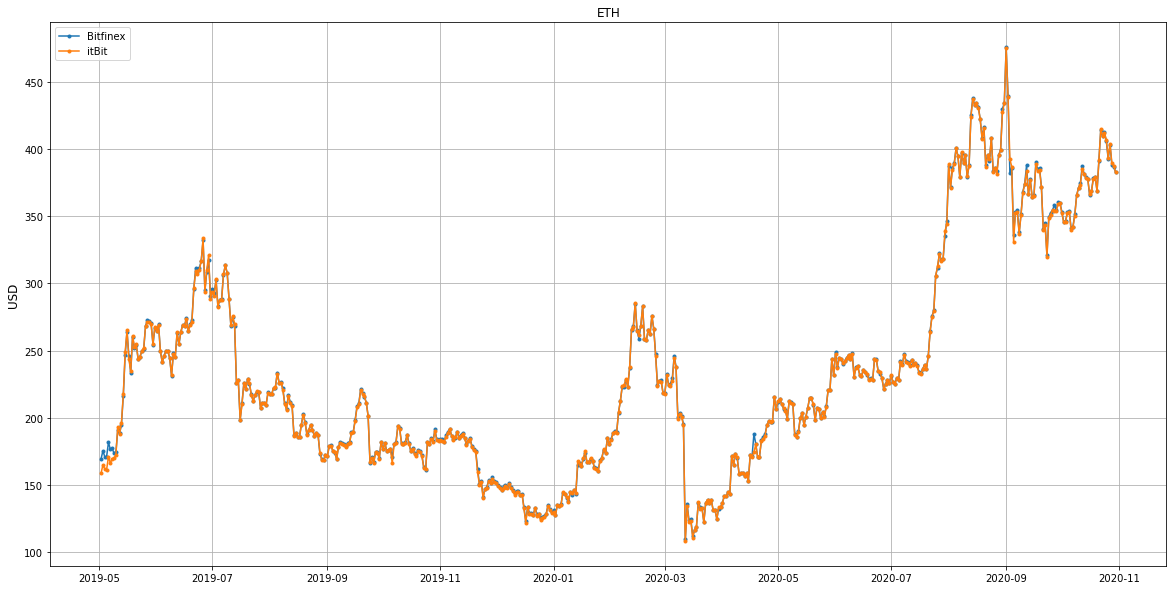

In [417]:
market1 = "Bitfinex"
market2 = "itBit"
 
df1 = fetchCryptoOHLC_byExchange(fsym, tsym, market1)
df2 = fetchCryptoOHLC_byExchange(fsym, tsym, market2)
 
# trim
df1 = df1[(df1.index > "2019-05-01") & (df1.index <= "2020-10-30")]
df2 = df2[(df2.index > "2019-05-01") & (df2.index <= "2020-10-30")]
 
# checkpoint
print(df1.close.shape[0], df2.close.shape[0])  # both sizes must be equal
 
# plotting
plt.figure(figsize=(20,10))
plt.plot(df1.close, '.-', label=market1)
plt.plot(df2.close, '.-', label=market2)
plt.legend(loc=2)
plt.title(fsym, fontsize=12)
plt.ylabel(tsym, fontsize=12)
plt.grid()

Every trading strategy requires some boundary conditions. Let’s summarise them all together before coding:

1. Algo-Strategy: Stat Arb for ETH/USD
2. Markets: Exmo, Kraken
3. Initial Investment: USD 10,000 split equally into two accounts
4. Trading Rules and Assumptions:
       (a) If asset1 close price (Exmo)  asset2 close price (Kraken) then
               sell asset1 short and buy asset2 long;
       (b) If asset1 close price  asset2 close price then close positions
               update accounts, sell asset2 short and buy asset1 long; etc.
       (c) Every time a new position is opened, invest a fixed amount of USD 2,500;
       (d) After the current trade, a new one is opened immediately at the same prices;
       (e) There is no slipage assumed;
       (f) The short selling is available on both markets;
       (g) There is no commission fee structure incorporated into trades;
       (h) The margin calls are ignored.
 

Therefore, we start trading with USD 5,000 on Exmo and Kraken account, respectively. That will allow us to monitor the “cash” level of both accounts after each trade. The full code to perform the backtest would look like this:

In [418]:
# Backtesting Stat Arb trading strategy for BTC/USD at Exmo and Kraken
#  cryptocurrency exchanges

# initial parameters
investment = 10000  # USD
account1, account2 = investment/2, investment/2  # USD
position = 0.5*(investment/2)  # USD

roi = []
ac1 = [account1]
ac2 = [account2]
money = []
pnl_exch1 = []
pnl_exch2 = []
trade_pnl = []

trade = False
n = df1.close.shape[0]  # number of data points

# running the backtest
for i in range(n):
    p1 = float(df1.close.iloc[i])
    p2 = float(df2.close.iloc[i])
    if(p1 > p2):
        asset1 = "SHORT"
        asset2 = "LONG"
        if(trade == False):
            open_p1 = p1  # open prices
            open_p2 = p2
            open_asset1 = asset1
            open_asset2 = asset2
            trade = True
            print("new traded opened")
            new_trade = False
        elif(asset1 == open_asset1):
            new_trade = False  # flag
        elif(asset1 == open_asset2):
            new_trade = True   # flag
            
    elif(p2 > p1):
        asset1 = "LONG"
        asset2 = "SHORT"
        if(trade == False):
            open_p1 = p1  # open prices
            open_p2 = p2
            open_asset1 = asset1
            open_asset2 = asset2
            trade = True
            print("new traded opened")
            new_trade = False
        elif(asset1 == open_asset1):
            new_trade = False  # flag
        elif(asset1 == open_asset2):
            new_trade = True   # flag
            
    if(i == 0):
        print(df1.close.iloc[i], df2.close.iloc[i], \
              asset1, asset2, trade, "----first trade info")
    else:
        if(new_trade):
            
            # close current position
            if(open_asset1 == "SHORT"):
                # PnL of both trades
                pnl_asset1 = open_p1/p1 - 1
                pnl_asset2 = p2/open_p2 -1
                pnl_exch1.append(pnl_asset1)
                pnl_exch2.append(pnl_asset2)
                print(open_p1, p1, open_p2, p2, open_asset1, \
                      open_asset2, pnl_asset1, pnl_asset2)
                # update both accounts
                account1 = account1 + position*pnl_asset1
                account2 = account2 + position*pnl_asset2
                print("accounts [USD] = ", account1, account2)
                if((account1 <=0) or (account2 <=0)):
                    print("--trading halted")
                    break
                # return on investment (ROI)
                total = account1 + account2
                roi.append(total/investment-1)
                ac1.append(account1)
                ac2.append(account2)
                money.append(total)
                print("ROI = ", roi[-1])
                print("trade closed\n")
                trade = False
                
                # open a new trade
                if(asset1 == "SHORT"):
                    open_p1 = p1
                    open_p2 = p2
                    open_asset1 = asset1
                    open_asset2 = asset2
                else:
                    open_p1 = p1
                    open_p2 = p2
                    open_asset1 = asset1
                    open_asset2 = asset2
                trade = True
                print("new trade opened", asset1, asset2, \
                      open_p1, open_p2)
             
            # close current position
            if(open_asset1 == "LONG"):
                # PnL of both trades
                pnl_asset1 = p1/open_p1 -1
                pnl_asset2 = open_p2/p2 - 1
                pnl_exch1.append(pnl_asset1)
                pnl_exch2.append(pnl_asset2)
                print(open_p1, p1, open_p2, p2, open_asset1, \
                      open_asset2, pnl_asset1, pnl_asset2)
                # update both accounts
                account1 = account1 + position*pnl_asset1
                account2 = account2 + position*pnl_asset2
                print("accounts [USD] = ", account1, account2)
                if((account1 <=0) or (account2 <=0)):
                    print("--trading halted")
                    break
                # return on investment (ROI)
                total = account1 + account2
                roi.append(total/investment-1)
                ac1.append(account1)
                ac2.append(account2)
                money.append(total)
                trade_pnl.append(pnl_asset1+pnl_asset2)
                print("ROI = ", roi[-1])
                print("trade closed\n")
                trade = False
                
                # open a new trade
                if(open_asset1 == "SHORT"):
                    open_p1 = p1
                    open_p2 = p2
                    open_asset1 = asset1
                    open_asset2 = asset2
                else:
                    open_p1 = p1
                    open_p2 = p2
                    open_asset1 = asset1
                    open_asset2 = asset2
                new_trade = False
                trade = True
                print("new trade opened:", asset1, asset2, \
                      open_p1, open_p2)
                
        else:
            print("   ",df1.close.iloc[i], df2.close.iloc[i], \
                  asset1, asset2)

new traded opened
169.25 158.65 SHORT LONG True ----first trade info
    175.29 164.65 SHORT LONG
    170.95 161.8 SHORT LONG
    171.01 161.3 SHORT LONG
    181.6 170.9 SHORT LONG
    176.45 166.2 SHORT LONG
    177.09 169.35 SHORT LONG
    173.42 170.15 SHORT LONG
    174.26 172.0 SHORT LONG
169.25 190.47 158.65 193.35 SHORT LONG -0.11140862078017533 0.2187204538291836
accounts [USD] =  4721.478448049562 5546.801134572959
ROI =  0.02682795826225215
trade closed

new trade opened LONG SHORT 190.47 193.35
190.47 190.47 193.35 193.35 LONG SHORT 0.0 0.0
accounts [USD] =  4721.478448049562 5546.801134572959
ROI =  0.02682795826225215
trade closed

new trade opened: LONG SHORT 190.47 193.35
190.47 188.25 193.35 187.75 LONG SHORT -0.011655378799810934 0.02982689747003997
accounts [USD] =  4692.3400010500345 5621.368378248059
ROI =  0.031370837929809436
trade closed

new trade opened: SHORT LONG 188.25 187.75
188.25 194.85 187.75 196.25 SHORT LONG -0.03387220939183988 0.045272969374167804
ac

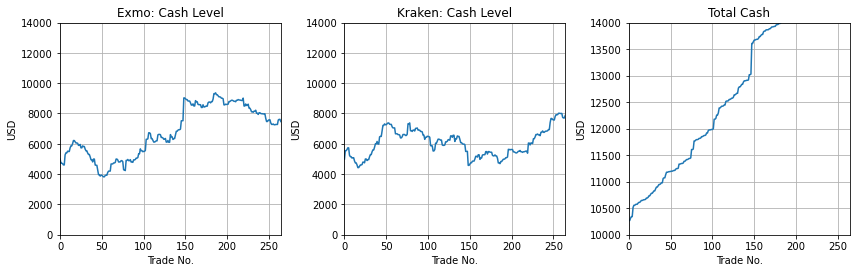

In [419]:
plt.figure(figsize=(12,7))
 
plt.subplot(2,3,1)
plt.plot(ac1)
plt.title("Exmo: Cash Level")
plt.xlabel("Trade No."); plt.ylabel("USD")
plt.grid()
plt.xlim([0, len(money)])
plt.ylim([0, 14001])
 
plt.subplot(2,3,2)
plt.plot(ac2)
plt.title("Kraken: Cash Level")
plt.xlabel("Trade No."); plt.ylabel("USD")
plt.grid()
plt.xlim([0, len(money)])
plt.ylim([0, 14001])
 
plt.subplot(2,3,3)
plt.plot(np.array(money))
plt.title("Total Cash")
plt.xlabel("Trade No."); plt.ylabel("USD")
plt.grid()
plt.xlim([0, len(money)])
plt.ylim([investment, 14000])
 
plt.tight_layout()
plt.savefig('cashlevels.png', bbox_inches='tight')

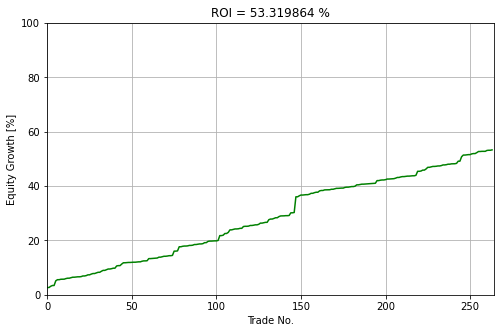

In [420]:
plt.figure(figsize=(8,5))
plt.plot(np.array(roi)*100, 'g')
plt.xlabel("Trade No."); 
plt.ylabel("Equity Growth [%]")
plt.title("ROI = %f %%" % (100*roi[-1]))
plt.xlim([0, len(money)])
plt.ylim([0, 100])
plt.grid()
plt.savefig('roi.png', bbox_inches='tight')